# 1) Data Loading

In [2]:
import pandas as pd
# Load the dataset
df=pd.read_csv('./data/resale_transactions.csv')

# 2) Exploratory Data Analysis and Data Cleaning 

In [3]:
# initial look of the dataset
df.head()

,id,month,flat_type,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_id,flatm_id,town_name,flatm_name
0,1,2018-05,5 ROOM,118,PASIR RIS ST 11,07 TO 09,123.0,1989,70 years 03 months,488000.0,17,5,PASIR RIS,Improved
1,2,2016-10,4 ROOM,101,RIVERVALE WALK,01 TO 03,100.0,1999,81,345000.0,21,8,SENGKANG,Model A
2,3,2018-10,5 ROOM,688A,CHOA CHU KANG DR,19 TO 21,110.0,2002,82 years 06 months,370000.0,9,5,CHOA CHU KANG,Improved
3,4,2015-12,4 ROOM,130,LOR AH SOO,13 TO 15,103.0,1984,67,432000.0,12,8,HOUGANG,Model A
4,5,2017-09,5 ROOM,533,SERANGOON NTH AVE 4,07 TO 09,122.0,1992,74 years 02 months,500000.0,22,5,SERANGOON,Improved


In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88688 entries, 0 to 88687
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   88688 non-null  int64  
 1   month                88688 non-null  object 
 2   flat_type            88688 non-null  object 
 3   block                88688 non-null  object 
 4   street_name          88688 non-null  object 
 5   storey_range         88688 non-null  object 
 6   floor_area_sqm       88688 non-null  float64
 7   lease_commence_date  88688 non-null  int64  
 8   remaining_lease      88688 non-null  object 
 9   resale_price         88688 non-null  float64
 10  town_id              88688 non-null  int64  
 11  flatm_id             88688 non-null  int64  
 12  town_name            87905 non-null  object 
 13  flatm_name           88174 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 9.5+ MB


In [5]:
df.isnull().sum()


id                       0
month                    0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
lease_commence_date      0
remaining_lease          0
resale_price             0
town_id                  0
flatm_id                 0
town_name              783
flatm_name             514
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,88688.0,42233.303739,24376.312037,1.0,21136.75,42228.5,63339.25,84465.0
floor_area_sqm,88688.0,97.520444,24.197379,31.0,76.00,96.0,112.00,280.0
lease_commence_date,88688.0,1570.225352,1226.315949,-2016.0,1980.00,1988.0,2000.00,2016.0
resale_price,88688.0,438679.303299,146670.254508,160000.0,335000.00,408000.0,505000.00,1200000.0
town_id,88688.0,14.631337,8.032285,1.0,8.00,15.0,22.00,26.0
flatm_id,88688.0,8.889185,3.906898,1.0,5.00,8.0,12.00,21.0


In [7]:
## observations
# negative values peresent in lease_commence_date
# largest house 280 sqm
# smallest house 31 sqm
# newest house built in 2016
# date of oldest house built is unknown as its a negative value in .describe method
# cheapest house = SGD 160000, most expensive house = SGD 1200000

# 'floor _area_sqm':
## Mean : 97.52
## Standard Deviation : 24.19
## normal distribution ( 73.33 sqm - 121.7sqm) this value are obtain from mean +- standard deviation

# 'resale_price':
## mean : 438679.30
## Standard Deviation : 146670.25
## normal distribution range SGD 292009 - SGD 585349
## Interquartile range (IQR) 25% : SGD 335000 75% : SGD 505000
## value of max resale_price : SGD 1200000 (suggst presence of outlier)
## outliers are houses that are prices much higher or lower than deviation from mean

# Check for Duplicates


In [8]:
df.duplicated().sum()


4223

In [9]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,id,month,flat_type,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_id,flatm_id,town_name,flatm_name
103,104,2016-09,3 ROOM,201E,TAMPINES ST 23,04 TO 06,68.0,-1987,70,305000.0,23,12,TAMPINES,New Generation
88570,104,2016-09,3 ROOM,201E,TAMPINES ST 23,04 TO 06,68.0,-1987,70,305000.0,23,12,TAMPINES,New Generation
106,107,2015-08,4 ROOM,146,SERANGOON NTH AVE 1,13 TO 15,83.0,-1987,70,355000.0,22,17,SERANGOON,Simplified
88156,107,2015-08,4 ROOM,146,SERANGOON NTH AVE 1,13 TO 15,83.0,-1987,70,355000.0,22,17,SERANGOON,Simplified
114,115,2017-03,4 ROOM,274D,PUNGGOL PL,16 TO 18,93.0,2013,95 years 04 months,560000.0,18,13,PUNGGOL,Premium Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87372,84427,2019-01,5 ROOM,348D,YISHUN AVE 11,13 TO 15,112.0,2013,93 years 09 months,758000.0,26,4,YISHUN,DBSS
84428,84429,2018-10,4 ROOM,838,HOUGANG CTRL,04 TO 06,100.0,-1997,77 years 05 months,530000.0,12,8,HOUGANG,Model A
85835,84429,2018-10,4 ROOM,838,HOUGANG CTRL,04 TO 06,100.0,-1997,77 years 05 months,530000.0,12,8,HOUGANG,Model A
84461,84462,2015-06,5 ROOM,596A,ANG MO KIO ST 52,07 TO 09,110.0,2002,86,760000.0,1,5,ANG MO KIO,Improved


# Drop the duplicates

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
# check if duplicates have been removed
df.tail()


,id,month,flat_type,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_id,flatm_id,town_name,flatm_name
84460,84461,2015-09,5 ROOM,352C,CANBERRA RD,10 TO 12,111.0,2001,85,468000.0,20,5,SEMBAWANG,Improved
84461,84462,2015-06,5 ROOM,596A,ANG MO KIO ST 52,07 TO 09,110.0,2002,86,760000.0,1,5,ANG MO KIO,Improved
84462,84463,2017-09,5 ROOM,979A,BUANGKOK CRES,01 TO 03,110.0,2003,84 years 10 months,380000.0,12,5,HOUGANG,Improved
84463,84464,2016-04,4 ROOM,474,ANG MO KIO AVE 10,01 TO 03,91.0,1984,66,406000.0,1,12,ANG MO KIO,New Generation
84464,84465,2019-03,5 ROOM,109D,EDGEDALE PLAINS,13 TO 15,111.0,2003,83 years 02 months,425000.0,18,5,PUNGGOL,Improved


In [12]:
df.duplicated().sum()

0

In [13]:
len(df)

84465

In [14]:
## observation 
# before dropping duplicates (88688 entries)
# after duplicates removed, (84465 entries)

# Total number of duplicates
num_duplicates = 88688 - 84465
print(num_duplicates)

4223


In [15]:
# check for null values left
df.isnull().sum()

id                       0
month                    0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
lease_commence_date      0
remaining_lease          0
resale_price             0
town_id                  0
flatm_id                 0
town_name              741
flatm_name             488
dtype: int64

In [16]:
## Observation
# previously town_name an flatm_name (783,514)
# after removing duplicates (741,488)
# confirmation that there were some duplicates in null value for town_name and flatm_name

# Univariate Analysis


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
# Set aesthetic tyle of the plots
sns.set_style('whitegrid')

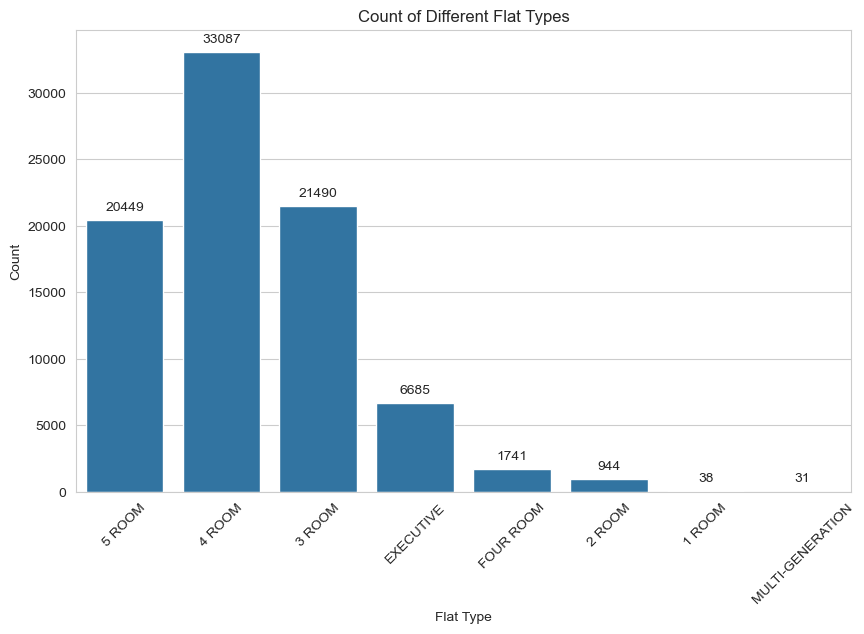

In [19]:


# Bar Chart for flat type with annotations
plt.figure(figsize=(10,6))
count_plot = sns.countplot(x='flat_type', data=df)
plt.title('Count of Different Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 9),
                        textcoords = 'offset points')
plt.show()

In [20]:
## Observation
# 4 ROOM and FOUR ROOM are of the same category and should be combined
# assumtion = *entry error*
# 4 ROOM has the highest distribution = most common flat_type
# Multi-generation is least common

In [21]:
# Replace 'FOUR ROOM' with '4 ROOM' in the 'flat_type' column
df['flat_type'] = df['flat_type'].replace('FOUR ROOM', '4 ROOM')

# verify the changes
print(df['flat_type'].value_counts())

flat_type
4 ROOM              34828
3 ROOM              21490
5 ROOM              20449
EXECUTIVE            6685
2 ROOM                944
1 ROOM                 38
MULTI-GENERATION       31
Name: count, dtype: int64


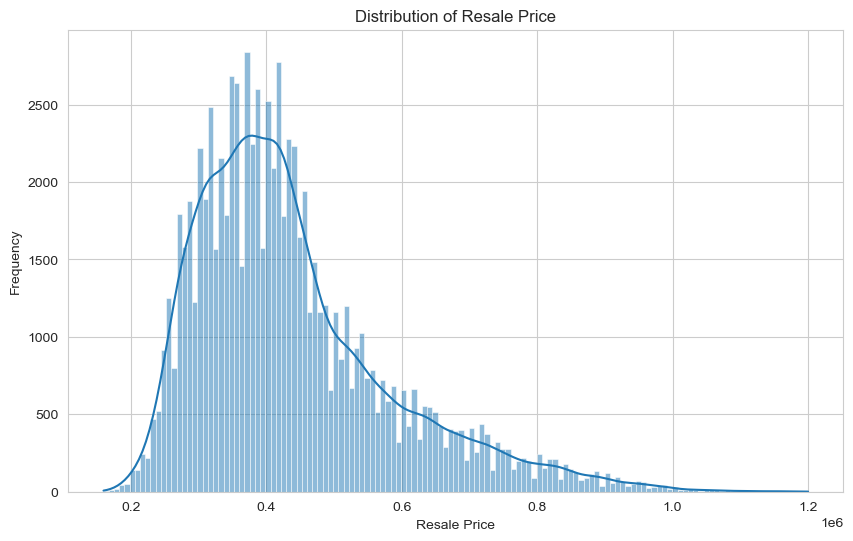

In [22]:
# 'resale_price' feature
# Let's plot a histogram to analyze the distribution
# aesthetic style
sns.set_style("whitegrid")

# Histogram for the resale price
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], kde=True)
plt.title('Distribution of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

In [23]:
## observation
# most HDB resale sold around SGD 400000 - SGD 42000
# distribution is right skewed due to less houses being sold for more than SGD 600,000

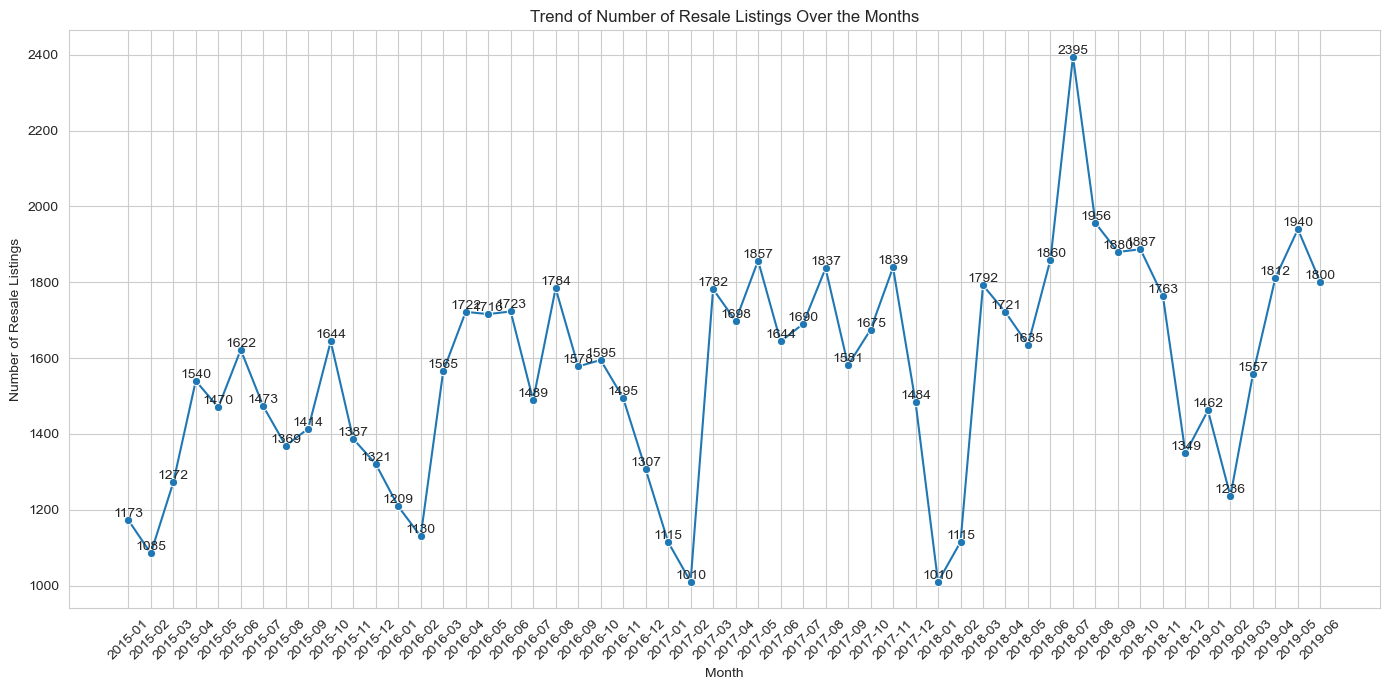

In [24]:
# feature 'months_counts' 
# style Line plot
# aesthetic style
sns.set_style("whitegrid")

# count the number of listings by month
month_counts = df['month'].value_counts().sort_index()

# create the line chart
plt.figure(figsize=(14, 7))
line_plot = sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o')

# annotate the date points
for x, y in zip(month_counts.index, month_counts.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Label chart
plt.title('Trend of Number of Resale Listings Over the Months')
plt.xlabel('Month')
plt.ylabel('Number of Resale Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
## observation
# less sales during january - february
# July 2018 highest amount of HDB sales

# Bivariate Analysis

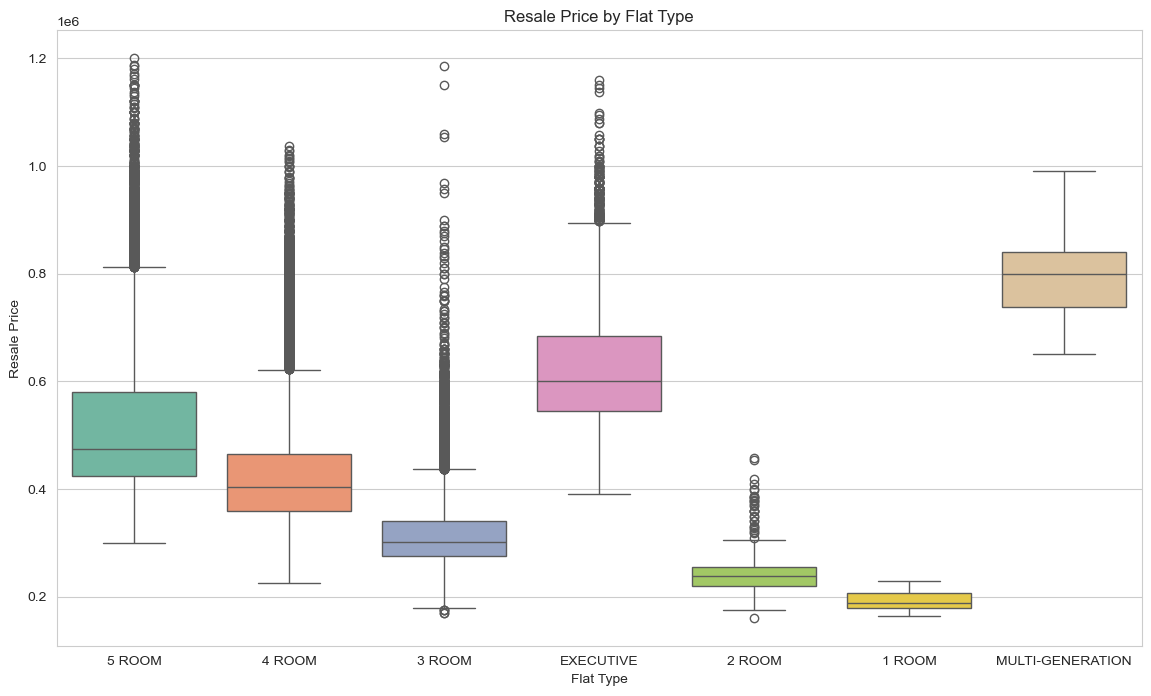

In [26]:
# flat_type vs resale_price
# style : Boxplots
# aesthetic style
sns.set_style('whitegrid')

# Box plot for flat_type vs resale_price
plt.figure(figsize=(14, 8))
sns.boxplot(x='flat_type', y='resale_price', data=df, hue='flat_type', palette='Set2')
plt.title('Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=0)
plt.show()

In [27]:
## Observation
# 5 ROOM has the highest number of flats sold above SGD 800000 followed by Executive
# 2 ROOM, 3 ROOM, 4 ROOM, 5 ROOM and EXECUTIVE show presence of outliers
# Outliers = price not within IQR standard
# Multi-generation flat has the highest median resale price
# 1 ROOM priced the lowest followed by 2 ROOM

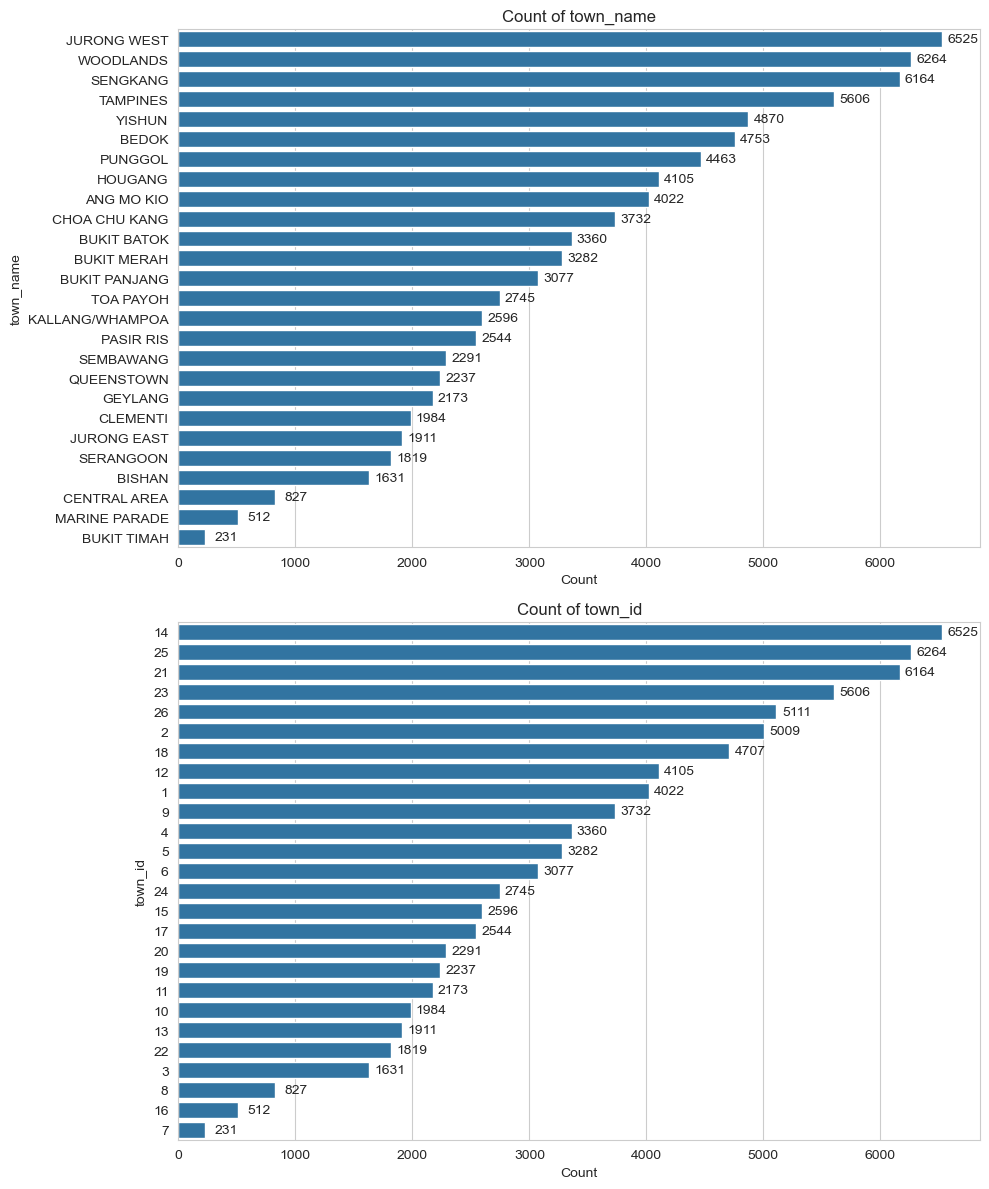

In [28]:
# There were 741 null values in town_name
# try to fill null values with town_id

# aesthetic style
sns.set_style('whitegrid')

# create a figure with 2 subplots (one above the other)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

#sort the town_name by count
sorted_town_name = df['town_name'].value_counts().index

# count plot for town_name with annotations
count_plot_1 = sns.countplot(y='town_name', data=df, order=sorted_town_name, ax=axes[0])
axes[0].set_title('Count of town_name')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('town_name')

# annotate the bars with the frequency count
for p in count_plot_1.patches:
    count_plot_1.annotate(format(p.get_width(), '.0f'),
                          (p.get_width(), p.get_y() + p.get_height() / 2),
                          ha='center', va='center',
                          xytext=(15, 0),
                          textcoords='offset points')
    
# sort the town_id by count
sorted_town_id = df['town_id'].value_counts().index

# count plot for town_id with annotations
count_plot_2 = sns.countplot(y='town_id', data=df, order=sorted_town_id, ax=axes[1])
axes[1].set_title('Count of town_id')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('town_id')

# annotate the bars with the frequency count
for p in count_plot_2.patches:
     count_plot_2.annotate(format(p.get_width(), '.0f'),
                           (p.get_width(), p.get_y() + p.get_height() / 2),
                           ha='center', va='center',
                           xytext=(15, 0),
                           textcoords='offset points')
     
# Adjust layout to prevent overlap
plt.tight_layout()

#show the combined plot
plt.show()

In [29]:
## Observation
# Discrepancies
# Yishun vs 26 (Yishun id) = 4870 vs 5111
# Bedok vs 2 (bedok id) = 4753 vs 5009
# Punggol vs 18 ( punggol id) = 4463 vs 4707

miss_yishun = 5111 - 4870
miss_bedok = 5009 - 4753
miss_punggol = 4707 - 4463
total_miss_town = miss_yishun + miss_bedok + miss_punggol
print(total_miss_town)


741


In [30]:
# this show than we have investigated the total amount of null values (741) for town_name

<function matplotlib.pyplot.show(close=None, block=None)>

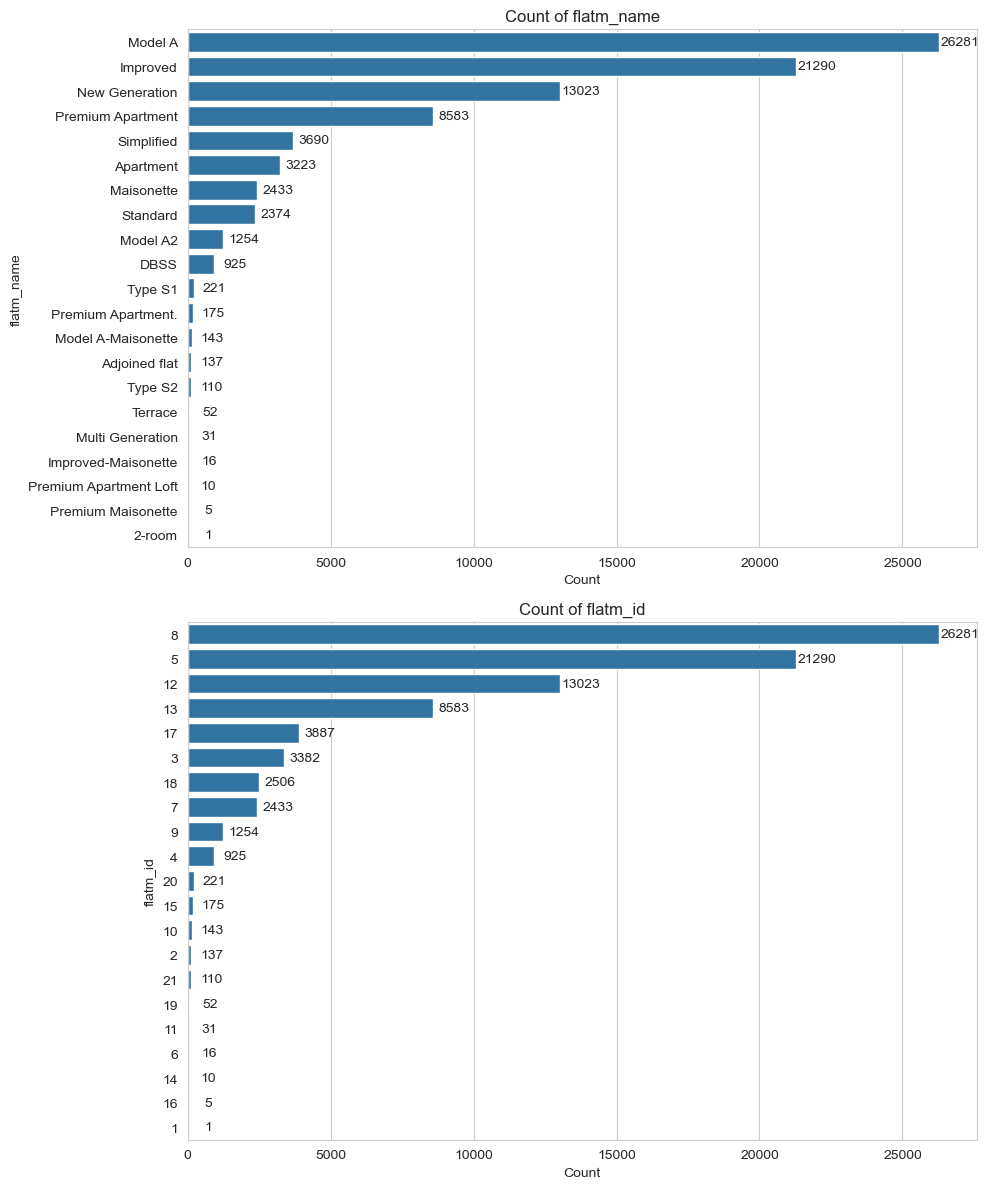

In [31]:
# 488 null values in flatm_name
# try to find using flatm_id
# flatm_name vs flatm_id

# aesthetic style
sns.set_style('whitegrid')

# Create a figure with 2 subplots
fig, axes = plt.subplots(2,1, figsize=(10,12))

# sort the town_name by count
sorted_flatm_name = df['flatm_name'].value_counts().index

# count plot for flatm.name with annotations
count_plot_1 = sns.countplot(y='flatm_name', data=df, order=sorted_flatm_name, ax=axes[0])
axes[0].set_title ('Count of flatm_name')
axes[0].set_xlabel ('Count')
axes[0].set_ylabel ('flatm_name')

# Annotate the bars with the frequency count

for _ in count_plot_1.patches:
    count_plot_1.annotate(format(_.get_width(), '.0f'),
                          (_.get_width(), _.get_y() + _.get_height() / 2),
                          ha='center', va='center',
                          xytext=(15,0),
                          textcoords='offset points')

# Soort the town_id by Count
sorted_flatm_id = df['flatm_id'].value_counts().index

# Count plot for flatm_id with annotations
count_plot_2 = sns.countplot(y='flatm_id', data=df, order=sorted_flatm_id, ax=axes[1])
axes[1].set_title ('Count of flatm_id')
axes[1].set_xlabel ('Count')
axes[1].set_ylabel ('flatm_id')

# Annotate the bars with the frequency count

for i in count_plot_2.patches:
    count_plot_2.annotate(format(i.get_width(), '.0f'),
                          (i.get_width(), i.get_y() + i.get_height() / 2),
                          ha='center', va='center',
                          xytext=(15,0),
                          textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout() 

# show combined plot
plt.show


In [32]:
## Observations
# Discrepancies
# Simplified  vs 17 (siimplified id) = 3690 vs 3887
# Apartment vs 3 (apartment id) = 3223 vs 3382
# masionette vs 18 (masionette id) = 2433 vs 2506
# standard vs 7 (standard id) = 2374 vs 2433

miss_simpl = 3887 - 3690
miss_apart = 3382 - 3223
miss_masion = 2506 - 2433
miss_stand = 2433 - 2374
total_miss_flat = miss_simpl + miss_apart + miss_masion + miss_stand
print(total_miss_flat)

488


In [33]:
def fill_missing_names(df: pd.DataFrame, id_column:str, name_column:str) ->pd.DataFrame:
    """
    Fills missing values in the 'name_column
 using the 'id_column'.

    Args:
        df (pd.DataFrame): The DataFrame containing the columns to be filled.
        id_columns (str): The name of the column containing the IDs.
        name_column (str): The name of the column containing the names to be filled.

    Returns:
        pd.DataFrame: The DataFrame with missing values in 'name_column' filled.
    """
    # Identify missing values in the 'name_column'
    missing_names= df[name_column].isna()

    # Create a dictionary mapping 'id_column' to 'name_column'
    name_mapping = df[[id_column, name_column]].dropna().drop_duplicates().set_index(id_column)[name_column].to_dict()

    # Fill missing 'name_column' using the mapping
    df.loc[missing_names, name_column] = df.loc[missing_names, id_column].map(name_mapping)

    return df

In [34]:
# Fill missing values in 'town_name' column
df = fill_missing_names (df=df, id_column='town_id', name_column='town_name')

# Fill missing vvalues in 'flatm_name' column
df = fill_missing_names(df=df, id_column='flatm_id', name_column='flatm_name')


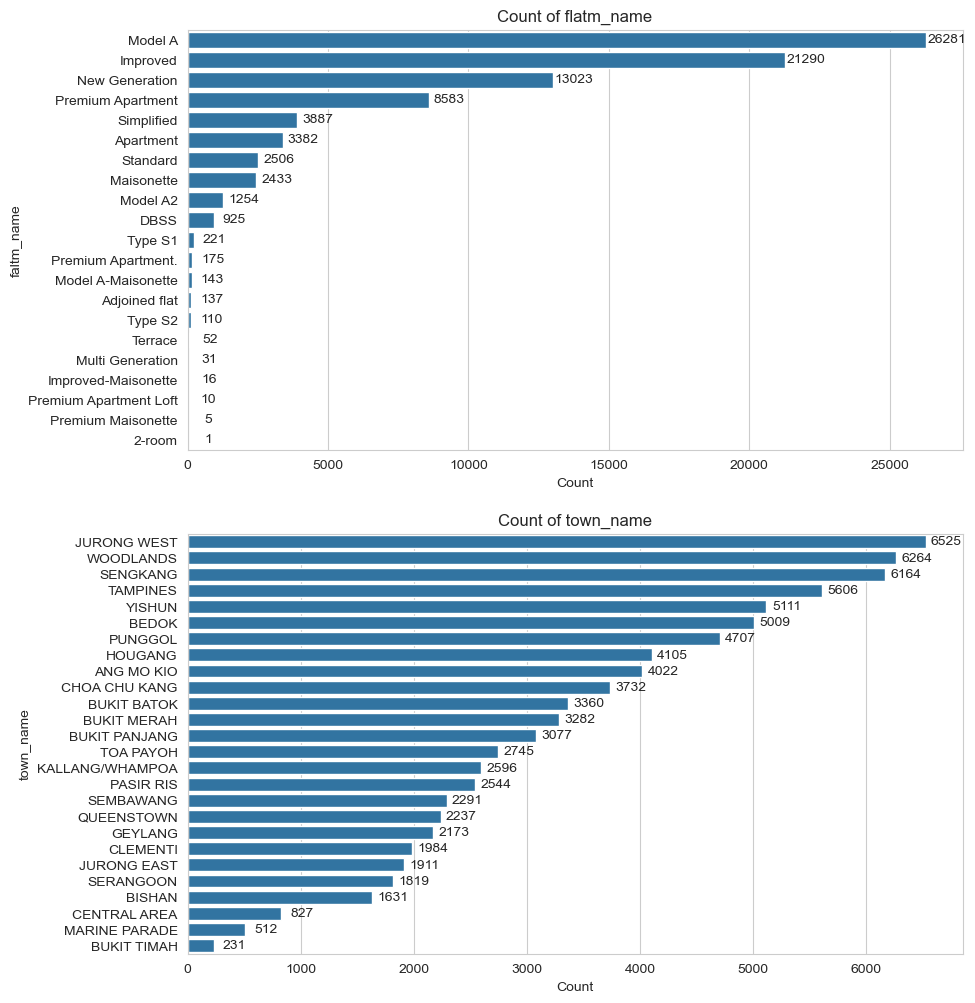

In [35]:
# print to observe the change

# Aesthetic style
sns.set_style('whitegrid')

# create figure with 2 subplots
fig, axes = plt.subplots(2,1,figsize=(10,12))

#sort the town_name by count
sorted_flatm_name = df['flatm_name'].value_counts().index

# count plot for flatm_name with annotations
count_plot_1 = sns.countplot(y='flatm_name', data=df, order=sorted_flatm_name, ax=axes[0])
axes[0].set_title('Count of flatm_name')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('faltm_name')

# Annotate the bars with the frequency count

for _ in count_plot_1.patches:
    count_plot_1.annotate(format(_.get_width(), '.0f'),
                          (_.get_width(), _.get_y() + _.get_height() / 2),
                          ha='center', va='center',
                          xytext=(15,0),
                          textcoords='offset points')
    
# count plot for town_name with annotations
count_plot_2 = sns.countplot(y='town_name', data=df, order=sorted_town_name, ax=axes[1])
axes[1].set_title('Count of town_name')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('town_name')

# annotate the bars with the frequency count
for _ in count_plot_2.patches:
    count_plot_2.annotate(format(_.get_width(), '.0f'),
                          (_.get_width(), _.get_y() + _.get_height() / 2),
                          ha='center', va='center',
                          xytext=(15,0),
                          textcoords='offset points')
    
plt.show()

In [36]:
# missing values have been filled up
# Check
df.isnull().sum()

id                     0
month                  0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
lease_commence_date    0
remaining_lease        0
resale_price           0
town_id                0
flatm_id               0
town_name              0
flatm_name             0
dtype: int64

# Multivariate Analysis

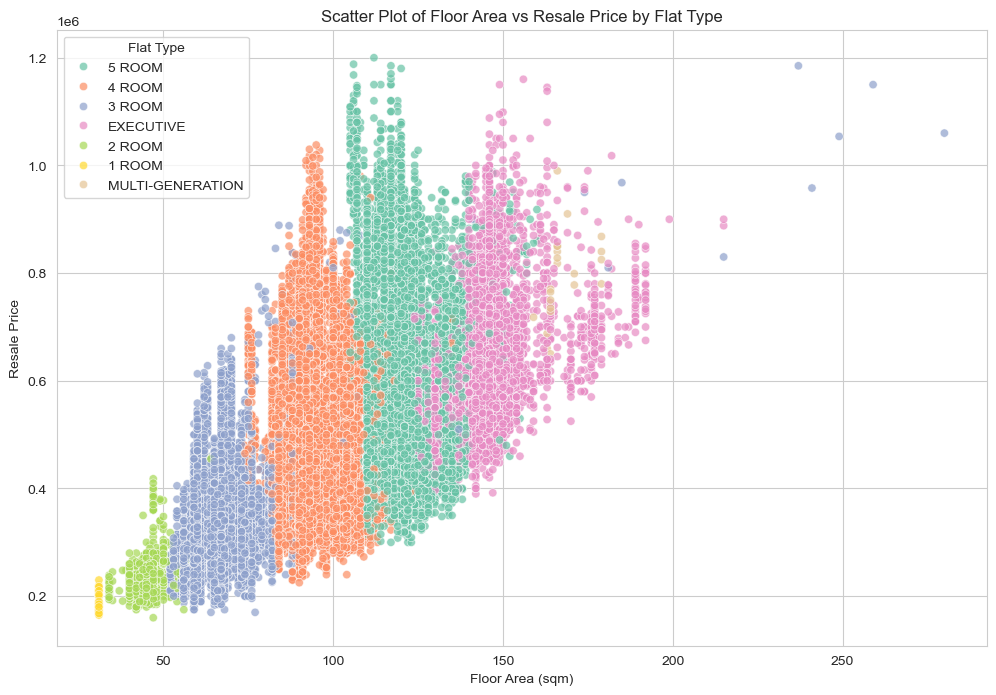

In [37]:
# compare 3 features (floor_area_sqm , resale_price , flat_type)
# continuous features : floor_area_sqm & resale_price
# hue : flat_type

# aesthetic style
sns.set_style("whitegrid")

# Scatter plot for floor area vs resale price with color encoding for flat type
plt.figure(figsize=(12, 8))
sns.scatterplot(x='floor_area_sqm', y='resale_price', hue='flat_type', data=df, palette='Set2', alpha=0.7)
plt.title('Scatter Plot of Floor Area vs Resale Price by Flat Type')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.legend(title='Flat Type')
plt.show()

In [38]:
## observation
# 3 ROOM category has outliers as some are sold higher than others
# filter the data for outliers
outliers = df[(df['flat_type'] == '3 ROOM') &
              (df['floor_area_sqm'] > 150) &
              (df['resale_price'] > 800000)]


In [39]:
# display the outliers
outliers

,id,month,flat_type,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_id,flatm_id,town_name,flatm_name
856,857,2018-09,3 ROOM,41,JLN BAHAGIA,01 TO 03,237.0,1972,52 years 10 months,1185000.0,15,19,KALLANG/WHAMPOA,Terrace
7472,7473,2018-06,3 ROOM,58,JLN MA'MOR,01 TO 03,174.0,1972,53 years 02 months,950000.0,15,19,KALLANG/WHAMPOA,Terrace
31858,31859,2015-03,3 ROOM,53,JLN MA'MOR,01 TO 03,280.0,1972,56,1060000.0,15,19,KALLANG/WHAMPOA,Terrace
47739,47740,2017-12,3 ROOM,65,JLN MA'MOR,01 TO 03,249.0,1972,53 years 07 months,1053888.0,15,19,KALLANG/WHAMPOA,Terrace
51992,51993,2018-05,3 ROOM,44,JLN BAHAGIA,01 TO 03,185.0,1972,53 years 02 months,968000.0,15,19,KALLANG/WHAMPOA,Terrace
54578,54579,2016-12,3 ROOM,57,JLN MA'MOR,01 TO 03,259.0,1972,54,1150000.0,15,19,KALLANG/WHAMPOA,Terrace
61997,61998,2017-05,3 ROOM,59,JLN MA'MOR,01 TO 03,181.0,1972,54 years 02 months,810000.0,15,19,KALLANG/WHAMPOA,Terrace
66428,66429,2017-06,3 ROOM,38,JLN BAHAGIA,01 TO 03,215.0,1972,54 years 01 month,830000.0,15,19,KALLANG/WHAMPOA,Terrace
78787,78788,2015-06,3 ROOM,60,JLN BAHAGIA,01 TO 03,241.0,1972,56,958000.0,15,19,KALLANG/WHAMPOA,Terrace


In [40]:
## observation
# 3 ROOM outliers are terrace HDBs that have been discontinued
# price range SGD 600000 - 1100000
# floor area is also higher than a typical 3 ROOM HDB

In [41]:
# further filter the data for 3-room terrace flats
terrace_outliers = df[(df['flat_type'] == '3 ROOM') &
                      (df['flatm_name'] == "Terrace")]

# display the outlier
terrace_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48.0,48168.062500,22777.117131,857.0,31793.75,51140.5,65752.50,83890.0
floor_area_sqm,48.0,117.708333,55.604974,78.0,83.00,93.0,113.25,280.0
lease_commence_date,48.0,1889.166667,569.171078,-1972.0,1972.00,1972.0,1972.00,1972.0
resale_price,48.0,813840.685000,122974.848464,635000.0,730000.00,795000.0,871250.00,1185000.0
town_id,48.0,15.666667,1.506487,15.0,15.00,15.0,15.00,19.0
flatm_id,48.0,19.000000,0.000000,19.0,19.00,19.0,19.00,19.0


In [42]:
## observations
# 48 entries 3 ROOM terraces
# price range SGD 635000 - 1185000


In [43]:
# absolute negative years values (changes any negative values to absolute values)
df['lease_commence_date'] = df['lease_commence_date'].abs()


In [44]:
# check changes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,84465.0,42233.000000,24383.089581,1.0,21117.0,42233.0,63349.0,84465.0
floor_area_sqm,84465.0,97.518221,24.203556,31.0,76.0,96.0,112.0,280.0
lease_commence_date,84465.0,1992.312603,11.728561,1966.0,1984.0,1992.0,2001.0,2016.0
resale_price,84465.0,438810.970117,146782.213376,160000.0,335000.0,408000.0,505000.0,1200000.0
town_id,84465.0,14.626851,8.032854,1.0,8.0,15.0,22.0,26.0
flatm_id,84465.0,8.886616,3.905763,1.0,5.0,8.0,12.0,21.0


# Correlation Matrix (Pearson and Spearman Rank Correlation Coefficient)

In [45]:

# select continuoes variables
continuous_vars_all = df[['floor_area_sqm', 'lease_commence_date', 'resale_price']]

#calculate the nPearson correlation matrix for the entire dataset
corr_matrix_pear = continuous_vars_all.corr(method='pearson')



In [46]:

corr_matrix_pear

,floor_area_sqm,lease_commence_date,resale_price
floor_area_sqm,1.000000,0.296933,0.640309
lease_commence_date,0.296933,1.000000,0.340613
resale_price,0.640309,0.340613,1.000000


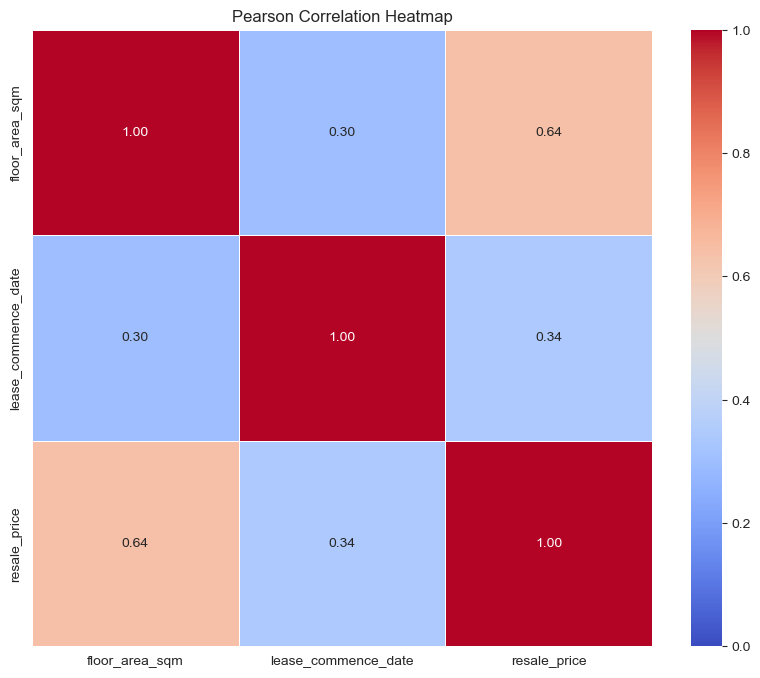

In [47]:
#plot the heatmap of the correlation matrix for the entire dataset
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pear, annot=True, cmap='coolwarm', vmin=0, center=0.5, vmax=1, linewidths=0.5, fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

In [48]:

# Function to convert storey_range to ordinal scale by taking the average of the range

def convert_storey_range(storey_range: str) ->float:
    """
    Converts a storey range string into its average numerical value.

    The function takes a storey range in the format 'XX TO YY', splits it into two parts, 
    converts these parts to integers, and returns the average of these integers.

    Args:
        storey_range(str): A string representing a range of storeys, in the format
        'XX TO YY'
    
    Returns:
        float: The average of the two storey in the range.

    Example:
        convert_storey_range('07 TO 09') -> 8.0   
    
    """

    range_values = storey_range.split(' TO ')
    return (int(range_values[0]) + int(range_values[1])) / 2

In [49]:
# Use the .apply() method to convert the 'storey_range' column with the function
df['storey_range'] = df['storey_range'].apply(convert_storey_range)

# Select relevant column for correlation analysis
spearman_vars = df[['storey_range', 'floor_area_sqm', 'lease_commence_date', 'resale_price']]

# Compute the Spearman correlation matrix
spearman_corr = spearman_vars.corr(method='spearman')

In [50]:
spearman_corr


,storey_range,floor_area_sqm,lease_commence_date,resale_price
storey_range,1.000000,0.050433,0.223914,0.273683
floor_area_sqm,0.050433,1.000000,0.347737,0.710693
lease_commence_date,0.223914,0.347737,1.000000,0.393121
resale_price,0.273683,0.710693,0.393121,1.000000


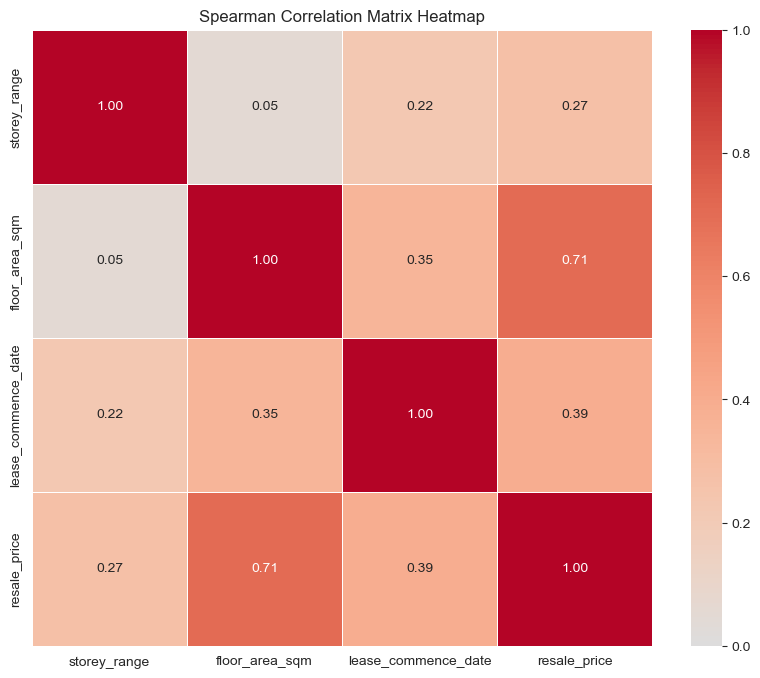

In [51]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, vmin=0, vmax=1, linewidths=0.5, fmt=".2f")
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

In [52]:
# drop irrelevant features

df = df.drop(columns=['town_id', 'id', 'flatm_id'])

In [53]:
#convert 'month' column to datetime

df['year_month'] = pd.to_datetime(df['month'], format='%Y-%m')

# extract year and month from the datetime format
df['year'] = df['year_month'].dt.year
df['month'] = df['year_month'].dt.month


df.head()

,month,flat_type,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_name,flatm_name,year_month,year
0,5,5 ROOM,118,PASIR RIS ST 11,8.0,123.0,1989,70 years 03 months,488000.0,PASIR RIS,Improved,2018-05-01,2018
1,10,4 ROOM,101,RIVERVALE WALK,2.0,100.0,1999,81,345000.0,SENGKANG,Model A,2016-10-01,2016
2,10,5 ROOM,688A,CHOA CHU KANG DR,20.0,110.0,2002,82 years 06 months,370000.0,CHOA CHU KANG,Improved,2018-10-01,2018
3,12,4 ROOM,130,LOR AH SOO,14.0,103.0,1984,67,432000.0,HOUGANG,Model A,2015-12-01,2015
4,9,5 ROOM,533,SERANGOON NTH AVE 4,8.0,122.0,1992,74 years 02 months,500000.0,SERANGOON,Improved,2017-09-01,2017


In [54]:
df = df.drop(columns=['year_month'])

df.head()

,month,flat_type,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_name,flatm_name,year
0,5,5 ROOM,118,PASIR RIS ST 11,8.0,123.0,1989,70 years 03 months,488000.0,PASIR RIS,Improved,2018
1,10,4 ROOM,101,RIVERVALE WALK,2.0,100.0,1999,81,345000.0,SENGKANG,Model A,2016
2,10,5 ROOM,688A,CHOA CHU KANG DR,20.0,110.0,2002,82 years 06 months,370000.0,CHOA CHU KANG,Improved,2018
3,12,4 ROOM,130,LOR AH SOO,14.0,103.0,1984,67,432000.0,HOUGANG,Model A,2015
4,9,5 ROOM,533,SERANGOON NTH AVE 4,8.0,122.0,1992,74 years 02 months,500000.0,SERANGOON,Improved,2017


In [55]:
import re

def extract_lease_info(lease_str : str) -> int:

    """
    Convert lease information from a string format to total months

    this function takes a string representing the remaining lease period, which
    may include year and months in various formats (e.g "70 years 3 months",
    "85 years", "67"), and converts it to the total number of months.

    args:
        lease_str(str) : the remaining lease period as a string

    Returns:
        int : the total number of months, or None if the input is NaN.
    """

    if pd.isna(lease_str):
        return None
    
    # regular expression to extract years and months
    years_match = re.search(r'(\d+)\s*years?', lease_str)
    months_match = re.search(r'(\d+)\s*months?', lease_str)
    number_match = re.search(r'^\d+$', lease_str.strip())

    if years_match:
        years = int(years_match.group(1))
    elif number_match: # if only a number is present, assume it's in years
        years = int(number_match.group(0))
    else:
        years = 0

    months = int(months_match.group(1)) if months_match else 0

    # convert the total lease period to months
    total_months = years * 12 + months
    return total_months


In [56]:
# extract lease information
df['remaining_lease_months'] = df['remaining_lease'].apply(extract_lease_info)

# display a random sample 
df[['remaining_lease', 'remaining_lease_months']].sample(5)

,remaining_lease,remaining_lease_months
65975,63,756
74191,58,696
66654,69 years 07 months,835
79602,82,984
42019,64 years 05 months,773


In [57]:
## observations
# 'storey range' does not directly correlate to 'resale price' has a weak correlation
# higher the house level does not mean resale price increases
# flats with higher remaining lease are worth more
# but not all as there are flat with lower lease than sold for more
# remaining lease is weakly correlated to higher resale price

# Summary of Data Cleaning

### Steps taken during Exploratory Data Analysis:

1. Duplicates dropped
2. Corrected inconsistencies in data entry (FOUR ROOM , 4 ROOM)
3. Filled missing values in 'town_name' amd 'flatm_name'
4. Converted negative values into absolute values (lease_commence_date)
5. converted 'story_range' string into numeric value
6. converted 'month' to datetime format
7. converted 'remaining_lease' to total months format

# 4) Preprocessing and Model Development

In [58]:
# Drop irrevelant columns
df = df.drop(columns=['remaining_lease', 'lease_commence_date'])
df = df.drop(columns = ['block', 'street_name'])

# Data splitting


In [59]:
X = df.drop(columns='resale_price')
y = df['resale_price']


In [60]:
# let see what is in x
X

,month,flat_type,storey_range,floor_area_sqm,town_name,flatm_name,year,remaining_lease_months
0,5,5 ROOM,8.0,123.0,PASIR RIS,Improved,2018,843
1,10,4 ROOM,2.0,100.0,SENGKANG,Model A,2016,972
2,10,5 ROOM,20.0,110.0,CHOA CHU KANG,Improved,2018,990
3,12,4 ROOM,14.0,103.0,HOUGANG,Model A,2015,804
4,9,5 ROOM,8.0,122.0,SERANGOON,Improved,2017,890
...,...,...,...,...,...,...,...,...
84460,9,5 ROOM,11.0,111.0,SEMBAWANG,Improved,2015,1020
84461,6,5 ROOM,8.0,110.0,ANG MO KIO,Improved,2015,1032
84462,9,5 ROOM,2.0,110.0,HOUGANG,Improved,2017,1018
84463,4,4 ROOM,2.0,91.0,ANG MO KIO,New Generation,2016,792


In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84465 entries, 0 to 84464
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month                   84465 non-null  int32  
 1   flat_type               84465 non-null  object 
 2   storey_range            84465 non-null  float64
 3   floor_area_sqm          84465 non-null  float64
 4   town_name               84465 non-null  object 
 5   flatm_name              84465 non-null  object 
 6   year                    84465 non-null  int32  
 7   remaining_lease_months  84465 non-null  int64  
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 5.2+ MB


In [62]:
# now let's see y
y

0        488000.0
1        345000.0
2        370000.0
3        432000.0
4        500000.0
           ...   
84460    468000.0
84461    760000.0
84462    380000.0
84463    406000.0
84464    425000.0
Name: resale_price, Length: 84465, dtype: float64

In [63]:
# y is just the resale price
y.info()

<class 'pandas.core.series.Series'>
Index: 84465 entries, 0 to 84464
Series name: resale_price
Non-Null Count  Dtype  
--------------  -----  
84465 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [64]:
import sklearn
from sklearn.model_selection import train_test_split

# split the data into training (80%) and test_validation (20%) set
X_train,X_temp, y_train, y_temp = train_test_split(X,y, test_size= 0.2, random_state = 42)

# split the test validation set 20%into validation 10% and test 10% sets
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp, test_size= 0.5, random_state=42)

In [65]:
print('Training set shape:', X_train.shape, y_train.shape)
print('Validation set shape: ', X_val.shape, y_val.shape)
print('Test set shape: ', X_test.shape, y_test.shape)

Training set shape: (67572, 8) (67572,)
Validation set shape:  (8446, 8) (8446,)
Test set shape:  (8447, 8) (8447,)


# Feature Scaling

## 1) Normalization
## 2) Standardization

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define numerical features to be standardized

numerical_features = ['floor_area_sqm', 'year', 'remaining_lease_months']

# Create a numerical transformer pipeline
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])



In [67]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Define nominal features to be one-not-endoded

nominal_features = ['month', 'town_name', 'flatm_name']

# Define ordinal features to be ordinally encoded
ordinal_features = ['flat_type']

# Define the ordinal categories for 'flat_type'
flat_type_categories = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'
]
# Define passthrough features that will not be transformed
passthrough_features = ['storey_range']

# create a nominal transformer pipeline
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [68]:
# create an ordinal transformer pipeline
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[flat_type_categories],
                               handle_unknown='use_encoded_value',unknown_value=-1))])



In [69]:
from sklearn.compose import ColumnTransformer

# Combine transformers into a single CloumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nom', nominal_transformer, nominal_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('passthrough', 'passthrough', passthrough_features) # this will passthrough the storey_range feature without transformation
    ],
    remainder='passthrough', n_jobs=-1 # this will use all available CPU cores for parallel processing
)

In [70]:
preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['floor_area_sqm', 'year',
                                  'remaining_lease_months']),
                                ('nom',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['month', 'town_name', 'flatm_name']),
                                ('ord',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['1 '
                                                                              'ROOM',
                                                                              '2 '
                                                                              'ROOM',
                                                                              '3 '
                                                                              'ROOM',
                                                                              '4 '
                                                                              'ROOM',
                                                                              '5 '
                                                                              'ROOM',
                                                                              'EXECUTIVE',
                                                                              'MULTI-GENERATION']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['flat_type']),
                                ('passthrough', 'passthrough',
                                 ['storey_range'])])

In [71]:
from sklearn.linear_model import LinearRegression

# Create the pipeline with a linear regression model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [72]:
lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['floor_area_sqm', 'year',
                                                   'remaining_lease_months']),
                                                 ('nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'town_name',
                                                   'flatm_name']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['1 '
                                                                                               'ROOM',
                                                                                               '2 '
                                                                                               'ROOM',
                                                                                               '3 '
                                                                                               'ROOM',
                                                                                               '4 '
                                                                                               'ROOM',
                                                                                               '5 '
                                                                                               'ROOM',
                                                                                               'EXECUTIVE',
                                                                                               'MULTI-GENERATION']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['flat_type']),
                                                 ('passthrough', 'passthrough',
                                                  ['storey_range'])])),
                ('regressor', LinearRegression())])

In [73]:
# fit the pipeline to the training data
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['floor_area_sqm', 'year',
                                                   'remaining_lease_months']),
                                                 ('nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'town_name',
                                                   'flatm_name']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['1 '
                                                                                               'ROOM',
                                                                                               '2 '
                                                                                               'ROOM',
                                                                                               '3 '
                                                                                               'ROOM',
                                                                                               '4 '
                                                                                               'ROOM',
                                                                                               '5 '
                                                                                               'ROOM',
                                                                                               'EXECUTIVE',
                                                                                               'MULTI-GENERATION']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['flat_type']),
                                                 ('passthrough', 'passthrough',
                                                  ['storey_range'])])),
                ('regressor', LinearRegression())])

In [74]:
# Predict on the validation set
y_val_pred = lr_pipeline.predict(X_val)



In [75]:
y_val_pred

array([366315.67475442, 466080.85534408, 322045.13746144, ...,
       593183.64828696, 320864.43928106, 736219.02811632])

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# caluculate regression metrics for validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Display the metrics
print(f'Validation Mean Absolute Error (MAE): {val_mae}')
print(f'Validation Mean Squared Error (MSE): {val_mse}')
print(f'Validation Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Validation R-squared (R2): {val_r2}')

Validation Mean Absolute Error (MAE): 42378.14044010859
Validation Mean Squared Error (MSE): 3026315044.1811533
Validation Root Mean Squared Error (RMSE): 55011.95364810409
Validation R-squared (R2): 0.8585447739956935


# Model testing

In [77]:
from sklearn.linear_model import Ridge

# Fit Ridge Regression with Lambda (alpha in scikit-learn)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1))  # You can adjust the alpha value as needed
])

ridge_pipeline.fit(X_train, y_train)

# Predict on the validation set with Ridge Regression
y_val_pred_ridge = ridge_pipeline.predict(X_val)

# Calculate regression metrics for validation set with Ridge Regression
val_mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
val_mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
val_rmse_ridge = root_mean_squared_error(y_val, y_val_pred_ridge)
val_r2_ridge = r2_score(y_val, y_val_pred_ridge)

# Display the metrics for Ridge Regression
print(f'Ridge Validation (MAE): {val_mae_ridge}')
print(f'Ridge Validation (MSE): {val_mse_ridge}')
print(f'Ridge Validation (RMSE): {val_rmse_ridge}')
print(f'Ridge Validation (R2): {val_r2_ridge}')

Ridge Validation (MAE): 42378.77725799848
Ridge Validation (MSE): 3025469186.2511024
Ridge Validation (RMSE): 55004.265164177064
Ridge Validation (R2): 0.8585843108657537


# Comparing Coefficients

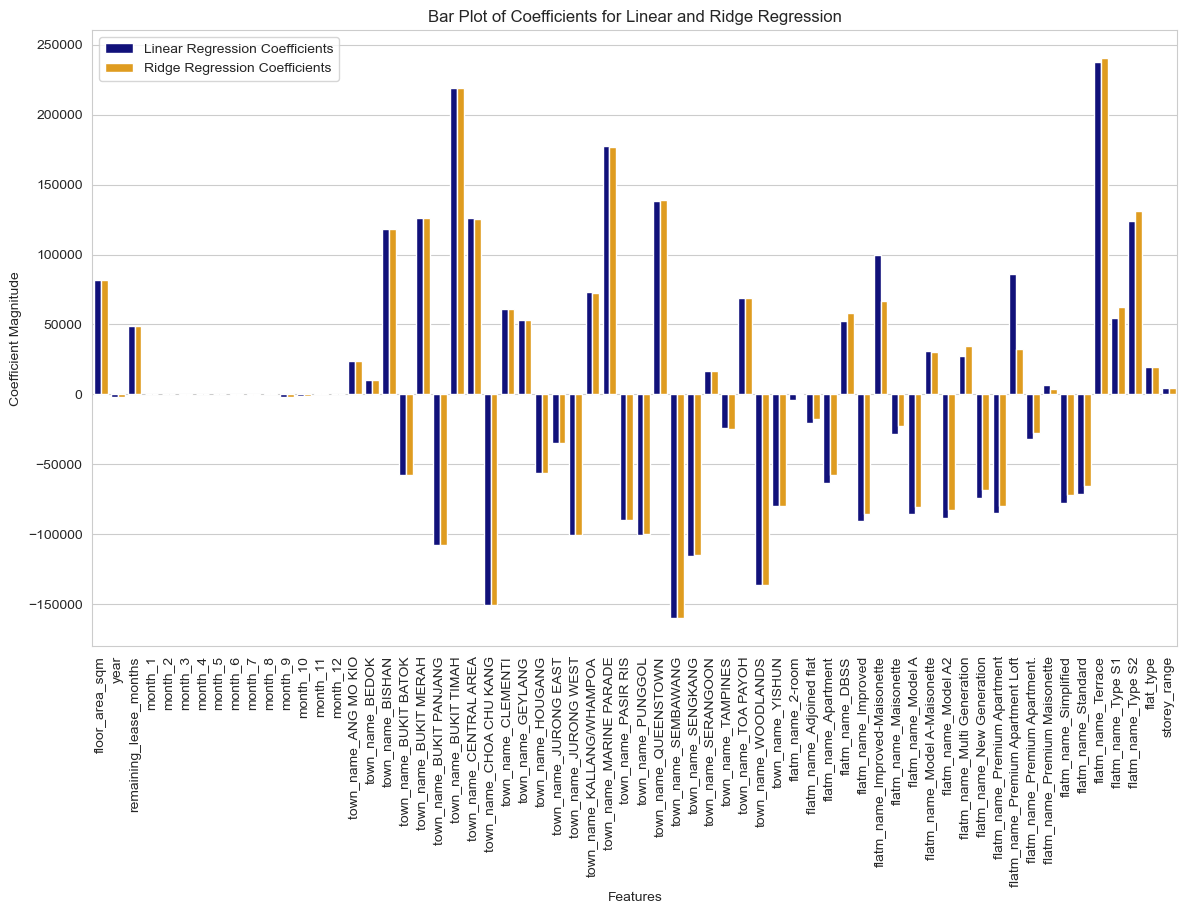

In [78]:
# extraact the coefficients from the linear regression model
le_coefs = lr_pipeline.named_steps['regressor'].coef_

# Extract the coefficients of the ridge regression model
ridge_coefs = ridge_pipeline.named_steps['regressor'].coef_

# Assuming features_names contains the names of the features after preprocessing
feature_names = (
    numerical_features +
    list(ridge_pipeline.named_steps['preprocessor'].transformers_[1]
[1].named_steps['onehot'].get_feature_names_out(nominal_features)) + ordinal_features + passthrough_features)

# Create a DataFrame for plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear Regression Coefficients': le_coefs,
    'Ridge Regression Coefficients': ridge_coefs
})

# melt the DataFrame to long format for seaborn
coef_df = coef_df.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

# Plot the coefficients
plt.figure(figsize=(14, 8))
sns.barplot(data=coef_df, x='Feature', y='Coefficient', hue='Model', palette=['darkblue', 'orange'])
plt.title('Bar Plot of Coefficients for Linear and Ridge Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation=90)
plt.grid(True,axis = 'y')
plt.legend(loc='upper left')
plt.show()

# Lasso Regression


In [79]:
from sklearn.linear_model import Lasso
# Fit Lasso Regression with Lambda (alpha in scikit-learn)
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1, max_iter=5000))  # You can adjust the alpha value as needed
])

lasso_pipeline.fit(X_train, y_train)

# Predict on the validation set with Lasso Regression
y_val_pred_lasso = lasso_pipeline.predict(X_val)    

# Calculate regression metrics for validation set with Lasso Regression
val_mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)    
val_mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
val_rmse_lasso = root_mean_squared_error(y_val, y_val_pred_lasso)
val_r2_lasso = r2_score(y_val, y_val_pred_lasso)

# Display the metrics for Lasso Regression
print(f'Lasso Validation (MAE): {val_mae_lasso}')
print(f'Lasso Validation (MSE): {val_mse_lasso}')
print(f'Lasso Validation (RMSE): {val_rmse_lasso}')
print(f'Lasso Validation (R2): {val_r2_lasso}')

Lasso Validation (MAE): 42377.53449849564
Lasso Validation (MSE): 3026107103.785443
Lasso Validation (RMSE): 55010.06365916552
Lasso Validation (R2): 0.8585544934912652


c:\Users\User\anaconda3\envs\hdbenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288613335005.96875, tolerance: 145696304045.82605
  model = cd_fast.sparse_enet_coordinate_descent(


In [80]:
from sklearn.linear_model import ElasticNet

# creat ElasticNet pipeline
en_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(l1_ratio=0.5))])
# Fit the ElasticNet pipeline to the training data
en_pipeline.fit(X_train, y_train)

# Predict on the validation set with ElasticNet Regression
y_val_pred_en = en_pipeline.predict(X_val)
# Calculate regression metrics for validation set with ElasticNet Regression
y_val_en_mae = mean_absolute_error(y_val, y_val_pred_en)
y_val_en_mse = mean_squared_error(y_val, y_val_pred_en)
y_val_en_rmse = root_mean_squared_error(y_val, y_val_pred_en)
y_val_en_r2 = r2_score(y_val, y_val_pred_en)
# Display the metrics for ElasticNet Regression
print(f'ElasticNet Validation (MAE): {y_val_en_mae}')
print(f'ElasticNet Validation (MSE): {y_val_en_mse}')
print(f'ElasticNet Validation (RMSE): {y_val_en_rmse}')
print(f'ElasticNet Validation (R2): {y_val_en_r2}')



ElasticNet Validation (MAE): 70861.25867960845
ElasticNet Validation (MSE): 9371863687.092392
ElasticNet Validation (RMSE): 96808.38645020581
ElasticNet Validation (R2): 0.5619427995481849


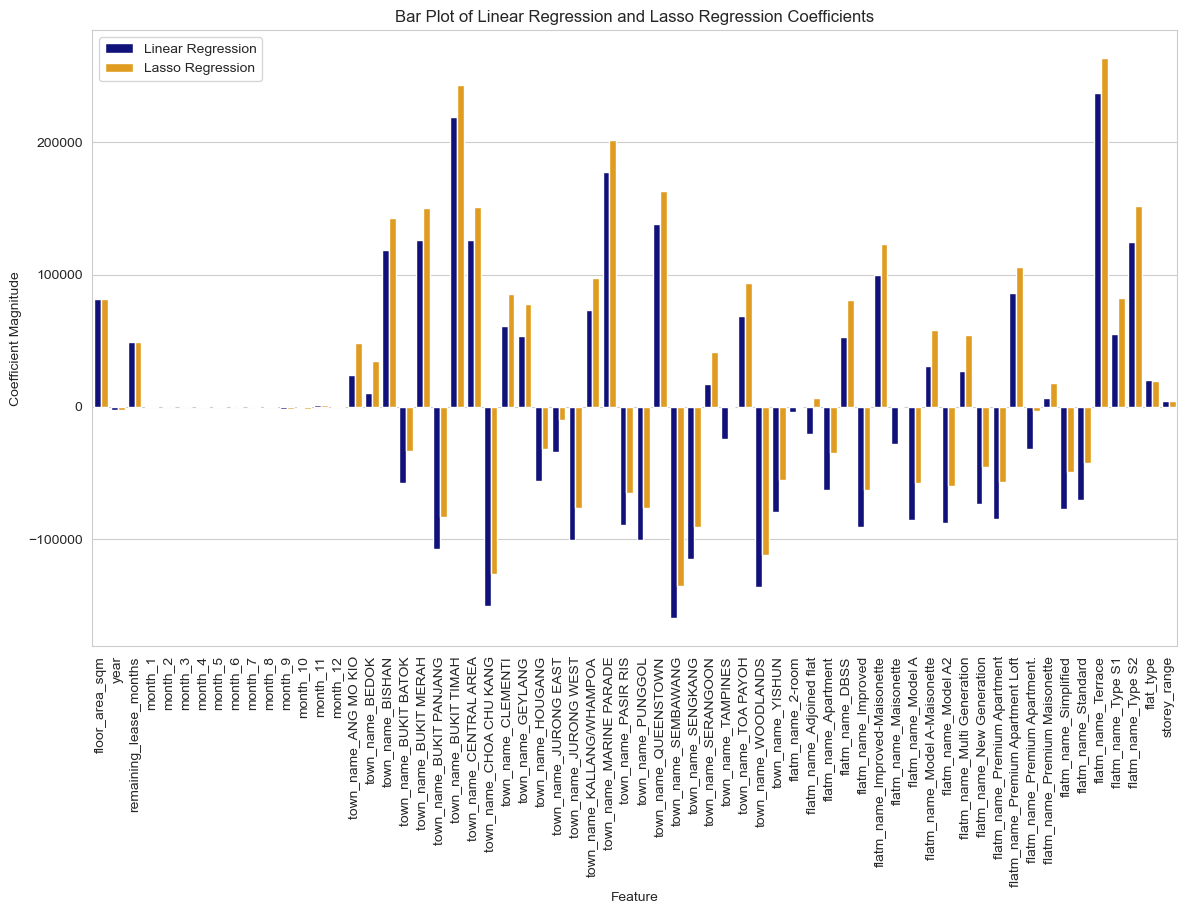

In [81]:
# Extract the coefficients of the linear regression model
lr_coefs = lr_pipeline.named_steps['regressor'].coef_

# Extract the coefficients of the ridge regression model
lasso_coefs = lasso_pipeline.named_steps['regressor'].coef_

# Assuming features_names contains the names of the features after preprocessing
feature_names= (
    numerical_features +
    list(ridge_pipeline.named_steps['preprocessor'].transformers_[1]
[1].named_steps['onehot'].get_feature_names_out(nominal_features)) + ordinal_features + passthrough_features
)

# Create a DataFrame for plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear Regression': lr_coefs,
    'Lasso Regression': lasso_coefs
})

# Melt the DataFrame to long format for seaborn
coef_df = coef_df.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

# Plotting the coefficients with seaborn
plt.figure(figsize=(14,8))
sns.barplot(data=coef_df, x='Feature', y='Coefficient', hue='Model', palette=['darkblue', 'orange'])

plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Bar Plot of Linear Regression and Lasso Regression Coefficients')
plt.xticks(rotation=90)
plt.grid(True,axis = 'y')
plt.legend(loc='upper left')
plt.show()

# Hyperparameter Tuning: Grid Search Cross Validation


In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000],
    'regressor__fit_intercept': [True, False]
}

# Create the pipeline with a ridge regression model

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Create the pipeline with a lasso regression model
lasso_pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# Perform grid search with cross-validation for Ridge regression
ridge_grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
ridge_grid_search.fit(X_train,y_train)

# Perform grid search with cross-validation for Lasso regression
lasso_grid_search = GridSearchCV(lasso_pipeline,param_grid, cv=5, scoring='r2', n_jobs=-1 )
lasso_grid_search.fit(X_train,y_train)


c:\Users\User\anaconda3\envs\hdbenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63636413174213.51, tolerance: 145696304045.82605
  model = cd_fast.sparse_enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['floor_area_sqm',
                                                                          'year',
                                                                          'remaining_lease_months']),
                                                                        ('nom',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'town_name',
                                                                          'flatm_name']),
                                                                        ('ord',
                                                                         P...
                                                                                          OrdinalEncoder(categories=[['1 '
                                                                                                                      'ROOM',
                                                                                                                      '2 '
                                                                                                                      'ROOM',
                                                                                                                      '3 '
                                                                                                                      'ROOM',
                                                                                                                      '4 '
                                                                                                                      'ROOM',
                                                                                                                      '5 '
                                                                                                                      'ROOM',
                                                                                                                      'EXECUTIVE',
                                                                                                                      'MULTI-GENERATION']],
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['flat_type']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['storey_range'])])),
                                       ('regressor', Lasso())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.1, 1, 10, 100, 1000],
                         'regressor__fit_intercept': [True, False]},
             scoring='r2')

In [83]:
# print the best parameters found by grid search for Ridge regression
print('Best Ridge Parameters:' ,ridge_grid_search.best_params_)

#print the best parameters found by grid search for lasso regression
print('Best Lasso PArameters: ', lasso_grid_search.best_params_)

Best Ridge Parameters: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True}
Best Lasso PArameters:  {'regressor__alpha': 0.1, 'regressor__fit_intercept': True}


In [85]:
# evalulate the best ridge model on the validation set
best_ridge_model = ridge_grid_search.best_estimator_
y_val_pred_ridge = best_ridge_model.predict(X_val)

# CAlculate the metrics for calidation set for ridge
val_mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
val_mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
val_rmse_ridge = root_mean_squared_error(y_val, y_val_pred_ridge)
val_r2_ridge = r2_score(y_val, y_val_pred_ridge)

print(f'Ridge Validation MAE: {val_mae_ridge}')
print(f'Ridege Validation MSE: {val_mse_ridge}')
print(f'Ridge validation RMSE: {val_rmse_ridge}')
print(f'Ridge Validation r2: {val_r2_ridge}')

# Evaluate the best lasso model on the validation set

best_lasso_model = lasso_grid_search.best_estimator_
y_val_pred_lasso = best_lasso_model.predict(X_val)

val_mae_lasso = mean_absolute_error(y_val,y_val_pred_lasso)
val_mse_lasso = mean_squared_error(y_val,y_val_pred_lasso)
val_rmse_lasso = root_mean_squared_error(y_val,y_val_pred_lasso)
val_r2_lasso = r2_score(y_val, y_val_pred_lasso)

print(f'Lasso Validation MAE: {val_mae_lasso}')
print(f'Lasso Validation MSE: {val_mse_lasso}')
print(f'Lasso Validation RMSE: {val_rmse_lasso}')
print(f'Lasso Validation r2: {val_r2_lasso}')

Ridge Validation MAE: 42371.8568282194
Ridege Validation MSE: 3024988836.761755
Ridge validation RMSE: 54999.89851592233
Ridge Validation r2: 0.8586067632359085
Lasso Validation MAE: 42377.90683999843
Lasso Validation MSE: 3026317805.7174964
Lasso Validation RMSE: 55011.97874751913
Lasso Validation r2: 0.8585446449166843


In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for hyperparameter tuning
param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000],
    'regressor__fit_intercept': [True, False]

}

# Create the pipline with a ridge regression model
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# create the pipeline with a lasso regression model
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# perform randomized search with cross-validation for ridge regression
ridge_random_search = RandomizedSearchCV(ridge_pipeline, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1) 
ridge_random_search.fit(X_train, y_train)

# perform randomized search with cross-validation for lasso regression
lasso_random_search = RandomizedSearchCV(lasso_pipeline, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)
lasso_random_search.fit(X_train, y_train)

c:\Users\User\anaconda3\envs\hdbenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63636413174213.51, tolerance: 145696304045.82605
  model = cd_fast.sparse_enet_coordinate_descent(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['floor_area_sqm',
                                                                                'year',
                                                                                'remaining_lease_months']),
                                                                              ('nom',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['month',
                                                                                'town_name',
                                                                                'flatm_name']),
                                                                              ('...
                                                                                                                            'ROOM',
                                                                                                                            '2 '
                                                                                                                            'ROOM',
                                                                                                                            '3 '
                                                                                                                            'ROOM',
                                                                                                                            '4 '
                                                                                                                            'ROOM',
                                                                                                                            '5 '
                                                                                                                            'ROOM',
                                                                                                                            'EXECUTIVE',
                                                                                                                            'MULTI-GENERATION']],
                                                                                                               handle_unknown='use_encoded_value',
                                                                                                               unknown_value=-1))]),
                                                                               ['flat_type']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['storey_range'])])),
                                             ('regressor', Lasso())]),
                   n_jobs=-1,
                   param_distributions={'regressor__alpha': [0.1, 1, 10, 100,
                                                             1000],
                                        'regressor__fit_intercept': [True,
        

# Final Evaluation


In [91]:
# best model from lasso regression(Grid Search)
best_lasso_model = lasso_grid_search.best_estimator_

# Predict on the test set with Lasso Regression
y_test_pred_lasso = best_lasso_model.predict(X_test)

# calculate the regression metrics for the test set for ridge
test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_rmse_lasso = root_mean_squared_error(y_test, y_test_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Print results
print('Best Lasso Regression Model, Final Test Metrics:')
print(f'Lasso Validation MAE: {test_mae_lasso}')
print(f'Lasso Validation MSE: {test_mse_lasso}')
print(f'Lasso Validation RMSE: {test_rmse_lasso}')
print(f'Lasso Validation r2: {test_r2_lasso}')

Best Lasso Regression Model, Final Test Metrics:
Lasso Validation MAE: 41293.76318010482
Lasso Validation MSE: 2897134495.844136
Lasso Validation RMSE: 53825.035957666914
Lasso Validation r2: 0.8656172056986005


In [92]:
# Best model from Ridge regression(Grid Search)
best_ridge_model = ridge_grid_search.best_estimator_

# Predict on the test set with Ridge Regression
y_test_pred_ridge = best_ridge_model.predict(X_test)

# Calculate the regression metrics for the test set for Ridge
test_mae_ridge = mean_absolute_error(y_test,y_test_pred_ridge)
test_mse_ridge = mean_squared_error(y_test,y_test_pred_ridge)
test_rmse_ridge = root_mean_squared_error(y_test,y_test_pred_ridge)
test_r2_ridge = r2_score(y_test,y_test_pred_ridge)

# Print the results
print('Best Ridge Regression Model, Final Test Metrics:')
print(f'Ridge Validation MAE: {test_mae_ridge}')
print(f'Ridge Validation MSE: {test_mse_ridge}')
print(f'Ridge Validation RMSE: {test_rmse_ridge}')
print(f'Ridge Validation r2: {test_r2_ridge}')

Best Ridge Regression Model, Final Test Metrics:
Ridge Validation MAE: 41286.310445735406
Ridge Validation MSE: 2896377756.341965
Ridge Validation RMSE: 53818.00587481819
Ridge Validation r2: 0.8656523068542443
